# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
# Check if Data has missing value
data.isnull().values.all()

False

# Splitting Data (Input - output)

In [5]:
data_input = data.drop(columns=["DEATH_EVENT"])
data_output = data["DEATH_EVENT"]

In [6]:
data_input.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [7]:
data_output

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

# Splitting Data (Train - Validation - Test)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x , x_test , y , y_test = train_test_split(data_input , data_output , test_size=0.33 , random_state=2)

x_train , x_val , y_train , y_val = train_test_split(x , y , test_size=0.33 , random_state=2)

In [10]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('------------')
print('x_val:', x_val.shape)
print('y_val:', y_val.shape)
print('------------')
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (134, 12)
y_train: (134,)
------------
x_val: (66, 12)
y_val: (66,)
------------
x_test: (99, 12)
y_test: (99,)


In [11]:
print('Train size =', x_train.shape[0])
print('Val size =', x_val.shape[0])
print('Test size =', x_test.shape[0])

Train size = 134
Val size = 66
Test size = 99


In [12]:
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
167,59.0,0,66,1,20,0,70000.0,2.4,134,1,0,135
215,73.0,0,582,0,35,1,203000.0,1.3,134,1,0,195
228,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207
138,62.0,0,281,1,35,0,221000.0,1.0,136,0,0,108
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43


# Feature Scaling (Normalization)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train) # for train (input)

x_train_scaled = scaler.transform(x_train)  # after appling equation
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = x_train.columns)

In [15]:
x_train_scaled.head()  # perfect Ranges 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,-0.262431,-0.796333,-0.614643,1.360538,-1.488149,-0.771517,-2.052518,0.887426,-0.520470,0.747087,-0.617611,0.030215
1,0.839778,-0.796333,0.127670,-0.735003,-0.267758,1.296148,-0.641013,-0.076442,-0.520470,0.747087,-0.617611,0.803881
2,0.209944,-0.796333,-0.629029,-0.735003,-1.081352,-0.771517,-0.280177,3.165660,-1.489122,-1.338532,-0.617611,0.958614
3,-0.026243,-0.796333,-0.305346,1.360538,-0.267758,-0.771517,-0.449982,-0.339316,-0.036144,-1.338532,-0.617611,-0.317934
4,-0.734806,1.255756,-0.578679,-0.735003,-1.488149,1.296148,1.640743,0.011182,0.690345,-1.338532,-0.617611,-1.156072


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

training_accuracy_values = []
validation_accuracy_values = []


for max_depth_val in max_depth_values:
    
    
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    model.fit(x_train_scaled, y_train)
    
    y_pred_train = model.predict(x_train_scaled)
    y_pred_val = model.predict(x_val_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

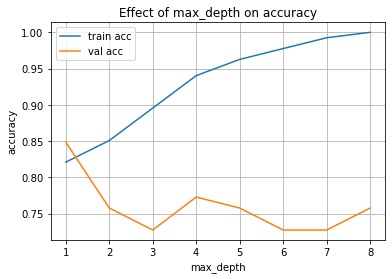

In [20]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.legend()
plt.grid(axis ='both')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Effect of max_depth on accuracy')
plt.show()

In [21]:
model_best = DecisionTreeClassifier(max_depth=1, random_state=2)
model_best.fit(x_train_scaled, y_train)

DecisionTreeClassifier(max_depth=1, random_state=2)

In [22]:
y_pred_test = model_best.predict(x_test_scaled)
print(accuracy_score(y_test , y_pred_test))

0.8787878787878788


# Logistic Regression

## Training and Validation

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

y_pred_train = model.predict(x_train_scaled)
y_pred_val = model.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.835820895522388
0.7727272727272727


## Testing

In [25]:
y_pred_test = model.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.8686868686868687


# Support Vector Machine

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## POLY SVM

In [27]:
svc = SVC(kernel='poly', degree=3, random_state=0, C=0.9)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8656716417910447
0.7575757575757576


## Linear SVM

In [28]:
svc = SVC(kernel='linear', random_state=0, C=0.8)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.835820895522388
0.7878787878787878


## RBF SVM

In [29]:
svc = SVC(kernel='rbf', gamma=0.01, random_state=0, C=10.0)
svc.fit(x_train_scaled, y_train)

y_pred_train = svc.predict(x_train_scaled)
y_pred_val = svc.predict(x_val_scaled)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_val, y_pred_val))

0.8432835820895522
0.803030303030303


## Testing

In [30]:
#Testing
y_pred_test = svc.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred_test))

0.8484848484848485


# Ensamble Learning


# Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier

In [32]:
#function to evaluate training and validation of each model
def evaluate_model(clf ,x_train ,y_train ,x_val ,y_val):
    clf.fit(x_train , y_train )
    y_pred_train=clf.predict(x_train)
    y_pred_val=clf.predict(x_val)
    
    acc_train=accuracy_score(y_train , y_pred_train)
    acc_val=accuracy_score(y_val , y_pred_val)
    
    print(clf.__class__.__name__) 
    print("Accuracy of training:" , acc_train)
    print("Accuracy of validation:" ,acc_val)
    print("-----------------------------------------")
    return acc_train , acc_val
#end of function declaration

estimators=[
    ('tree',model_best ),
    ('logistic',model),
    ('svc',svc )
]
voting_clf=VotingClassifier(estimators)
all_estimators=estimators + [("voting",voting_clf)]
results = {                #(later for chart)
    "model" :[],
    "acc train":[],
    "acc val":[]
}
for name , clf in all_estimators:
    
    acc_train , acc_val = evaluate_model(clf ,x_train_scaled ,y_train ,x_val_scaled ,y_val)
    results["model"].append(name)
    results["acc train"].append(acc_train)
    results["acc val"].append(acc_val)

DecisionTreeClassifier
Accuracy of training: 0.8208955223880597
Accuracy of validation: 0.8484848484848485
-----------------------------------------
LogisticRegression
Accuracy of training: 0.835820895522388
Accuracy of validation: 0.7727272727272727
-----------------------------------------
SVC
Accuracy of training: 0.8432835820895522
Accuracy of validation: 0.803030303030303
-----------------------------------------
VotingClassifier
Accuracy of training: 0.8432835820895522
Accuracy of validation: 0.803030303030303
-----------------------------------------


# Bagging Classifier

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf=BaggingClassifier(
    SVC(random_state=1),n_estimators=100,
    max_samples=0.90,bootstrap=True,random_state=1,n_jobs=-1
)
acc_train_bag , acc_val_bag = evaluate_model(bag_clf ,x_train_scaled ,y_train ,x_val_scaled ,y_val)

BaggingClassifier
Accuracy of training: 0.8656716417910447
Accuracy of validation: 0.7727272727272727
-----------------------------------------


# Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

Rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)
acc_train_Rf, acc_val_Rf = evaluate_model(
Rf_clf,x_train_scaled ,y_train ,x_val_scaled ,y_val)

RandomForestClassifier
Accuracy of training: 0.917910447761194
Accuracy of validation: 0.8636363636363636
-----------------------------------------


# Choose Best Model

In [36]:
all_results = {
'model': [],
'acc train': [],
'acc val': []
}
all_results['model'] =results['model'] + ['bagging', 'random forest']
all_results['acc train'] =  results['acc train']+[acc_train_bag, acc_train_Rf]
all_results['acc val'] =results['acc val'] +[acc_val_bag , acc_val_Rf]



In [37]:
all_results_df = pd.DataFrame(all_results)
all_results_df = all_results_df.sort_values( by='acc val', ascending=False, ignore_index=True)
all_results_df

,model,acc train,acc val
0,random forest,0.917910,0.863636
1,tree,0.820896,0.848485
2,svc,0.843284,0.803030
3,voting,0.843284,0.803030
4,logistic,0.835821,0.772727
5,bagging,0.865672,0.772727


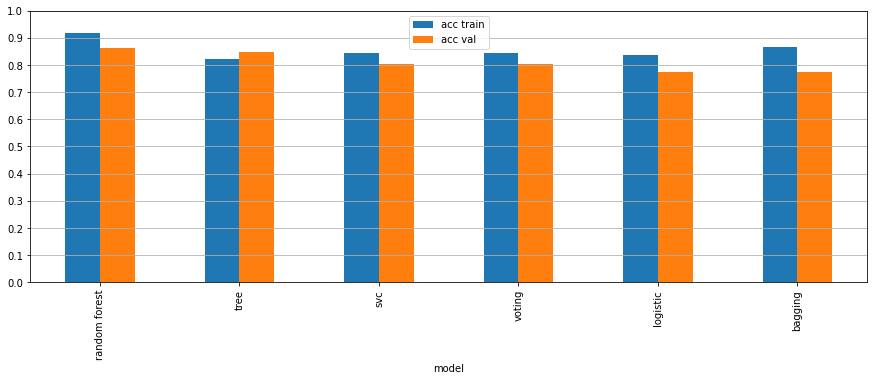

In [38]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
all_results_df.plot.bar(x="model" , y =["acc train" , "acc val"] , figsize=(15,5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(axis='y')
plt.show()

In [39]:
model_best=RandomForestClassifier(n_estimators=500, max_depth=3, random_state=1)

model_best.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=1)

In [40]:
y_pred_test=model_best.predict(x_test_scaled)

In [41]:
accuracy_score(y_test , y_pred_test)

0.9191919191919192

# Save model

In [42]:
import pickle

with open('saved-model.pickle', 'wb') as f:
       pickle.dump(model_best, f)
        
with open('scaler.pickle', 'wb') as f:
       pickle.dump(scaler, f)